# ECON 220 - Data Science for Economists
## Week 10 - The Central Limit Theorem
### Instructor: Jafet Baca-Obando

## Step 1. Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
path = os.getcwd()

## Step 2. Load the dataset

In [3]:
data = pd.read_csv("income.csv")
data.head(10)

,AGE,INCTOT
0,39,89500
1,61,32000
2,36,33000
3,34,10000
4,46,35000
5,88,39000
6,58,241800
7,20,12000
8,69,15000
9,47,150000


## Step 3. Sampling distribution of the sample mean

Let's explore the distribution of personal income using a histogram.

**Practice.** How do we code this in Python?

Text(0, 0.5, 'Frequency')

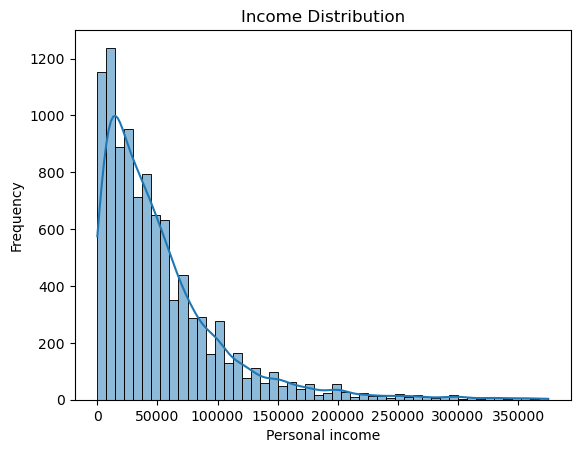

In [4]:
sns.histplot(data['INCTOT'], bins=50, kde=True)
plt.title('Income Distribution')
plt.xlabel('Personal income')
plt.ylabel('Frequency')

In [5]:
data.shape

(10000, 2)

Assume that our dataset is our population. 

Let us run a simulation. Instead of looking at the whole population, let's look at _sample means_.

1. Take a random sample of size 50 from the population.
2. Compute the sample mean.
3. Repeat this process 10,000 times.

In [17]:
N = 10000  # Number of samples
n = 50     # Sample size
sample_means = []
for _ in range(N):
    sample = data['INCTOT'].sample(n, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

In [18]:
sample_means

[53673.6,
 58107.4,
 61327.6,
 52998.6,
 48662.4,
 56220.4,
 62685.0,
 59995.8,
 50199.0,
 57421.8,
 61104.2,
 52130.4,
 57720.88,
 52371.0,
 55341.4,
 58555.4,
 36935.8,
 45385.8,
 61386.8,
 40819.4,
 51169.8,
 65194.2,
 55364.0,
 53222.0,
 64446.0,
 51649.8,
 51631.68,
 51862.0,
 69558.0,
 52252.4,
 53096.0,
 49580.6,
 52126.0,
 41142.0,
 52506.0,
 59629.4,
 51547.6,
 55242.6,
 54150.2,
 47272.4,
 43610.8,
 62822.8,
 67502.4,
 57088.4,
 52784.8,
 51267.2,
 50096.0,
 45724.0,
 67326.6,
 53648.0,
 58592.4,
 62090.0,
 52815.4,
 63485.0,
 41232.6,
 51450.0,
 46068.8,
 42584.0,
 54001.0,
 49456.4,
 70527.8,
 37050.8,
 45706.8,
 54119.0,
 52606.4,
 59939.4,
 47931.2,
 50974.2,
 52266.2,
 50206.4,
 52343.0,
 53705.0,
 57808.0,
 65415.4,
 62890.6,
 48105.4,
 48785.4,
 57414.2,
 52500.0,
 57493.2,
 52353.8,
 40287.6,
 52742.6,
 52848.8,
 58158.6,
 50736.6,
 55918.6,
 69610.6,
 49269.0,
 54814.0,
 41602.8,
 44511.0,
 41754.0,
 47174.8,
 33884.0,
 48653.4,
 51200.0,
 68102.8,
 63503.0,
 62231.8

**Practice**. Plot the distribution of the sample mean.

Text(0, 0.5, 'Frequency')

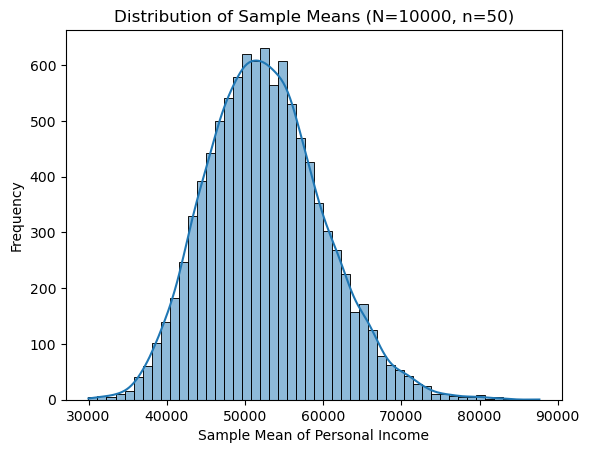

In [19]:
sns.histplot(sample_means, bins=50, kde=True)
plt.title('Distribution of Sample Means (N=10000, n=50)')
plt.xlabel('Sample Mean of Personal Income')
plt.ylabel('Frequency')

Compare this with the population mean.

In [13]:
print(data['INCTOT'].mean())
print(np.mean(sample_means))

52635.0046
52567.80185999999


This looks like a normal distribution. In fact, this is the Central Limit Theorem in action!

**Central Limit Theorem (CLT)** states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution, provided the samples are independent and identically distributed (i.i.d.) and the sample size is sufficiently large.

A rule of thumb is that a sample size of 30 or more is generally considered sufficient for the CLT to hold.

## Step 4. Verifying the CLT with a uniform distribution

Simulate a population with size 10,000 from a uniform distribution between 0 and 10.

In [20]:
unif = stats.uniform.rvs(size=10000, loc=0, scale=10)

In [21]:
unif

array([2.20737168, 3.68386304, 8.28815041, ..., 4.59180385, 9.18179566,
       3.04111603])

<Axes: ylabel='Count'>

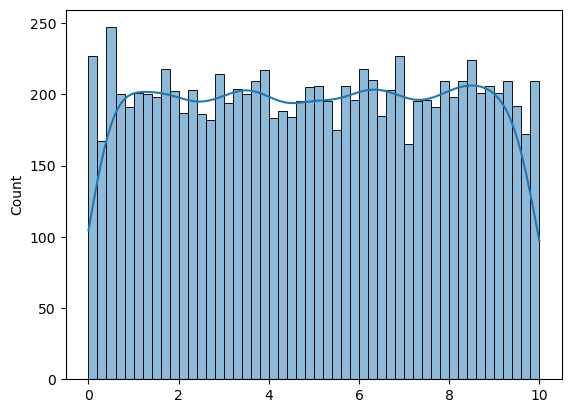

In [22]:
sns.histplot(unif, bins=50, kde=True)

Now repeat the process of taking 10,000 samples of size 50 each from this uniform population and compute the sample mean for each sample.

In [23]:
N = 10000 # Number of samples
n = 50    # Sample size
sample_means = []
for _ in range(N):
    sample = np.random.choice(unif, n, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

Visualize the distribution of the sample means.

Text(0, 0.5, 'Frequency')

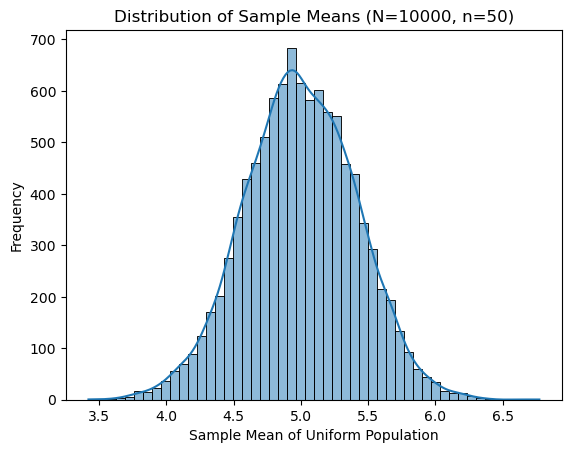

In [25]:
sns.histplot(sample_means, bins=50, kde=True)
plt.title('Distribution of Sample Means (N=10000, n=50)')
plt.xlabel('Sample Mean of Uniform Population')
plt.ylabel('Frequency')

## Step 5. Sampling distribution for a sample proportion

- Proportion $Y=\frac{X}{n}$, so $X \sim Binom(n,p)$, ($X$ is the number of successes, and $Y$ is the proportion of successes).
- We claim that proportion $Y \sim Norm\left(p, \sqrt{\frac{p(1-p)}{n}}\right)$ by CLT.
- If this is true, we can rely on the Normal distribution to work with proportion.

Consider the following example: If the unemployment rate in a population is 3.8%, what is the probability that in a sample of 100 individuals, 3 or fewer are unemployed?

In [26]:
stats.binom.cdf(3, 100, 0.038)

0.4703111414330726

Now, let's simulate the proportion of successes in samples of size 100 from a population with a success probability of 3.8%.

In [31]:
N = 100000  # Number of samples
n = 1000    # Sample size
p = 0.038   # Success probability
sample_proportions = [] # List to store sample proportions
for _ in range(N):
    sample = stats.binom.rvs(n=n, p=p)
    proportion = sample/n
    sample_proportions.append(proportion)

Let's plot the distribution of sample proportions and overlap a normal distribution with mean $p$ and standard deviation $\sqrt{\frac{p(1-p)}{n}}$.

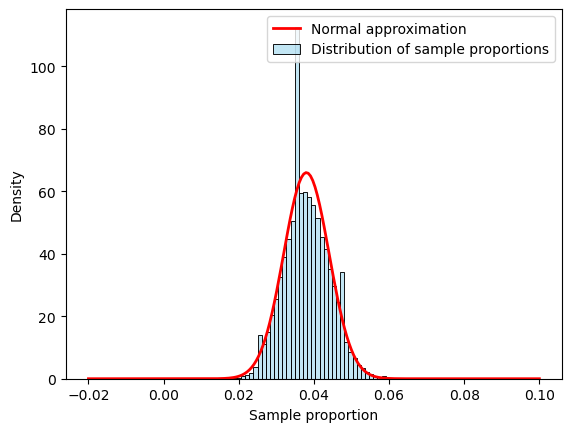

In [32]:
mu = p
sigma = np.sqrt(p * (1 - p) / n)

# Plot proportions and normal distribution with correct parameters
sns.histplot(sample_proportions, bins=50, stat='density', color='skyblue', alpha=0.5, label='Distribution of sample proportions')
x = np.linspace(-0.02, 0.1, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', lw=2, label=f'Normal approximation')
plt.xlabel('Sample proportion')
plt.ylabel('Density')
plt.legend()

In [ ]:
!jupyter nbconvert --to html "Week 10. Central Limit Theorem.ipynb"